In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
data = pd.read_csv('final_with_covid_AS.csv')
data.head()

,CountCases,BedDys,BeddystoCC,Severity,DiedCases,DiedBdDys,Hsptlsns,April,August,December,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,CovidPrd
0,17,133,7.823529,75,4,9,13,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,13,372,28.615385,63,4,34,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,106,13.250000,48,4,13,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,218,4.844444,153,3,24,42,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,24,238,9.916667,90,3,8,21,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
road_users = ['CarDriver', 'CarPngr', 'Mtrcyclist', 'PdlCyclist', 'Pedestrian']
counter_parties = ['Cntrprt23WldMV', 'CntrprtCrTrkVn', 'CntrprtFxdStnry', 'CntrprtHvyVhcl',  'CntrprtOther', 'CntrprtNMV', 'CntrprtPdlC', 'CntrprtPdstAnml', 'CntrprtTrn']

for user in road_users:
    for counter_party in counter_parties:
        filtered_data = data[(data[user] == 1) & (data[counter_party] == 1)]
        result = filtered_data['BeddystoCC'].mean()
        print(f"Mean of BeddystoCC for {user} and {counter_party}: {result}")

Mean of BeddystoCC for CarDriver and Cntrprt23WldMV: 2.2855072463782613
Mean of BeddystoCC for CarDriver and CntrprtCrTrkVn: 4.715519605979346
Mean of BeddystoCC for CarDriver and CntrprtFxdStnry: 7.454963727173361
Mean of BeddystoCC for CarDriver and CntrprtHvyVhcl: 7.396413710519362
Mean of BeddystoCC for CarDriver and CntrprtOther: 3.881398537473492
Mean of BeddystoCC for CarDriver and CntrprtNMV: 2.755952380954082
Mean of BeddystoCC for CarDriver and CntrprtPdlC: 2.372549019607843
Mean of BeddystoCC for CarDriver and CntrprtPdstAnml: 3.275685102143498
Mean of BeddystoCC for CarDriver and CntrprtTrn: 4.461904761904762
Mean of BeddystoCC for CarPngr and Cntrprt23WldMV: 2.1691176470588234
Mean of BeddystoCC for CarPngr and CntrprtCrTrkVn: 4.946846488441651
Mean of BeddystoCC for CarPngr and CntrprtFxdStnry: 6.69083740411062
Mean of BeddystoCC for CarPngr and CntrprtHvyVhcl: 5.3688394683052145
Mean of BeddystoCC for CarPngr and CntrprtOther: 3.078140830799392
Mean of BeddystoCC for Car

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

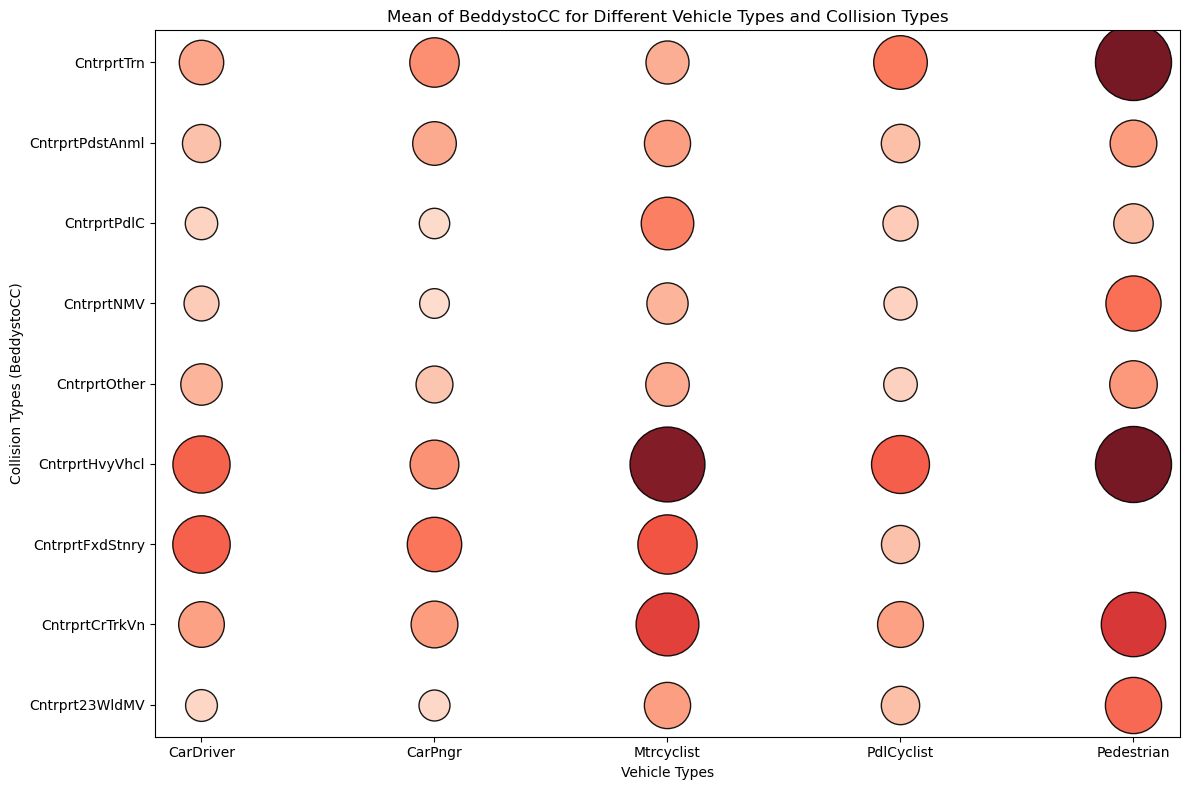

In [7]:
data = {
    "CarDriver": [2.2855072463782613, 4.715519605979346, 7.454963727173361, 7.396413710519362, 3.881398537473492, 2.755952380954082, 2.372549019607843, 3.275685102143498, 4.461904761904762],
    "CarPngr": [2.1691176470588234, 4.946846488441651, 6.69083740411062, 5.3688394683052145, 3.078140830799392, 1.992537313432836, 2.090909090909091, 4.305401662049862, 5.525],
    "Mtrcyclist": [4.833244015732047, 8.915389471154059, 7.942463898737645, 12.686810551571941, 4.272191443999536, 3.8446601941747574, 6.241269841266666, 4.811825764245369, 4.1875],
    "PdlCyclist": [3.323809523807143, 4.7528476615225825, 3.27826694998599, 7.5881824713275865, 2.5504120211585333, 2.476470588235294, 2.784559214373333, 3.329281874038306, 6.5],
    "Pedestrian": [7.138644688643956, 9.383837773517874, 0, 13.081643356641026, 5.112737341770569, 6.887254901960785, 3.5207823960977995, 4.9338235294117645, 13.087155963302752]
}
index = ["Cntrprt23WldMV", "CntrprtCrTrkVn", "CntrprtFxdStnry", "CntrprtHvyVhcl", "CntrprtOther", "CntrprtNMV", "CntrprtPdlC", "CntrprtPdstAnml", "CntrprtTrn"]
df = pd.DataFrame(data, index=index)

plt.figure(figsize=(12, 8))

max_value = df.values.max()
sizes = (df.values / max_value) * 1000

for i in range(len(index)):
    for j in range(len(data.keys())):
        color = plt.cm.Reds(df.iloc[i][j] / max_value)
        plt.scatter(j, i, s=sizes[i][j]*3, alpha=0.9, c=color, edgecolor='Black')

plt.title("Mean of BeddystoCC for Different Vehicle Types and Collision Types")
plt.xlabel("Vehicle Types")
plt.ylabel("Collision Types (BeddystoCC)")
plt.xticks(ticks=range(len(data.keys())), labels=data.keys())  
plt.yticks(ticks=range(len(index)), labels=index) 

plt.tight_layout()  
plt.show()


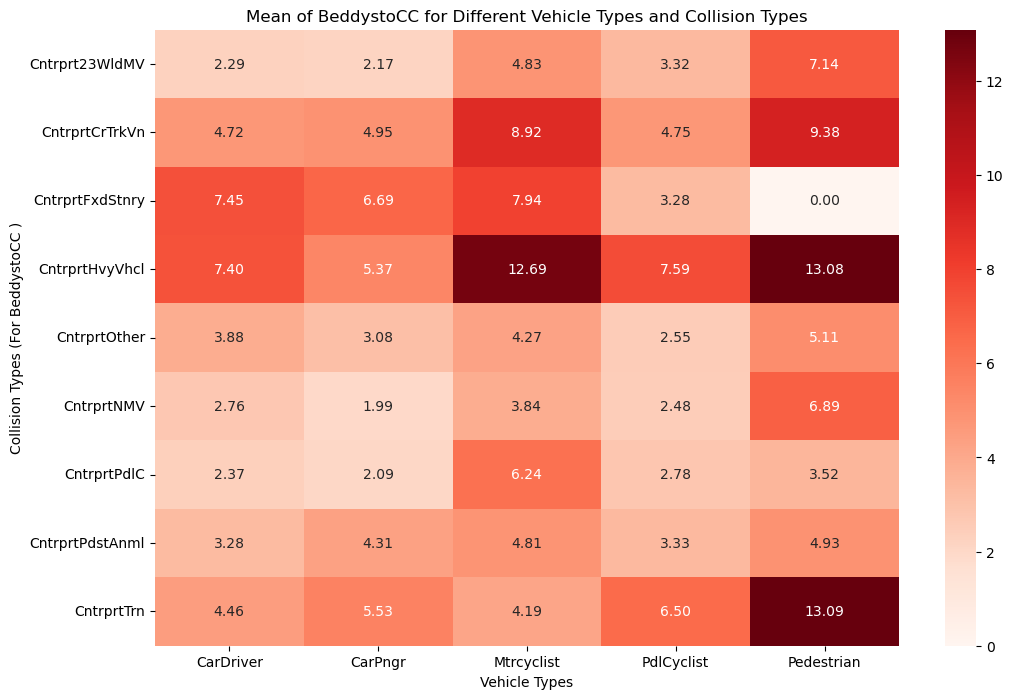

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "CarDriver": [2.2855072463782613, 4.715519605979346, 7.454963727173361, 7.396413710519362, 3.881398537473492, 2.755952380954082, 2.372549019607843, 3.275685102143498, 4.461904761904762],
    "CarPngr": [2.1691176470588234, 4.946846488441651, 6.69083740411062, 5.3688394683052145, 3.078140830799392, 1.992537313432836, 2.090909090909091, 4.305401662049862, 5.525],
    "Mtrcyclist": [4.833244015732047, 8.915389471154059, 7.942463898737645, 12.686810551571941, 4.272191443999536, 3.8446601941747574, 6.241269841266666, 4.811825764245369, 4.1875],
    "PdlCyclist": [3.323809523807143, 4.7528476615225825, 3.27826694998599, 7.5881824713275865, 2.5504120211585333, 2.476470588235294, 2.784559214373333, 3.329281874038306, 6.5],
    "Pedestrian": [7.138644688643956, 9.383837773517874, 0, 13.081643356641026, 5.112737341770569, 6.887254901960785, 3.5207823960977995, 4.9338235294117645, 13.087155963302752]
}
index = ["Cntrprt23WldMV", "CntrprtCrTrkVn", "CntrprtFxdStnry", "CntrprtHvyVhcl", "CntrprtOther", "CntrprtNMV", "CntrprtPdlC", "CntrprtPdstAnml", "CntrprtTrn"]

df = pd.DataFrame(data, index=index)

plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap='Reds', fmt='.2f')
plt.title("Mean of BeddystoCC for Different Vehicle Types and Collision Types")
plt.xlabel("Vehicle Types")
plt.ylabel("Collision Types (For BeddystoCC )")
plt.show()


In [3]:
road_users = ['CarDriver', 'CarPngr', 'Mtrcyclist', 'PdlCyclist', 'Pedestrian']
counter_parties = ['Cntrprt23WldMV', 'CntrprtCrTrkVn', 'CntrprtFxdStnry', 'CntrprtHvyVhcl', 'CntrprtNClsn', 'CntrprtNA', 'CntrprtOther', 'CntrprtNMV', 'CntrprtPdlC', 'CntrprtPdstAnml', 'CntrprtTrn']

for user in road_users:
    for counter_party in counter_parties:
        filtered_data = data[(data[user] == 1) & (data[counter_party] == 1)]
        result = filtered_data['Hsptlsns'].sum()
        print(f"Sum of Hsptlsns for {user} and {counter_party}: {result}")

Sum of Hsptlsns for CarDriver and Cntrprt23WldMV: 255
Sum of Hsptlsns for CarDriver and CntrprtCrTrkVn: 72188
Sum of Hsptlsns for CarDriver and CntrprtFxdStnry: 31362
Sum of Hsptlsns for CarDriver and CntrprtHvyVhcl: 5651
Sum of Hsptlsns for CarDriver and CntrprtNClsn: 16964
Sum of Hsptlsns for CarDriver and CntrprtNA: 0
Sum of Hsptlsns for CarDriver and CntrprtOther: 1560
Sum of Hsptlsns for CarDriver and CntrprtNMV: 209
Sum of Hsptlsns for CarDriver and CntrprtPdlC: 54
Sum of Hsptlsns for CarDriver and CntrprtPdstAnml: 923
Sum of Hsptlsns for CarDriver and CntrprtTrn: 104
Sum of Hsptlsns for CarPngr and Cntrprt23WldMV: 71
Sum of Hsptlsns for CarPngr and CntrprtCrTrkVn: 26243
Sum of Hsptlsns for CarPngr and CntrprtFxdStnry: 10284
Sum of Hsptlsns for CarPngr and CntrprtHvyVhcl: 1808
Sum of Hsptlsns for CarPngr and CntrprtNClsn: 8729
Sum of Hsptlsns for CarPngr and CntrprtNA: 0
Sum of Hsptlsns for CarPngr and CntrprtOther: 773
Sum of Hsptlsns for CarPngr and CntrprtNMV: 69
Sum of Hsptls

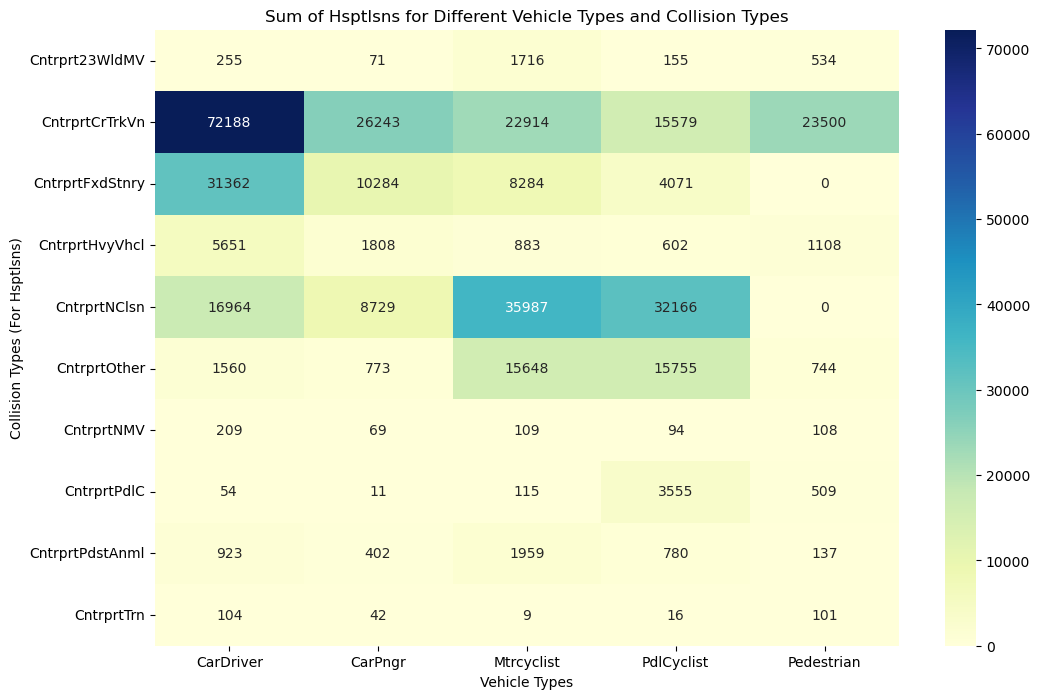

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    "CarDriver": [255, 72188, 31362, 5651, 16964, 1560, 209, 54, 923, 104],
    "CarPngr": [71, 26243, 10284, 1808, 8729,  773, 69, 11, 402, 42],
    "Mtrcyclist": [1716, 22914, 8284, 883, 35987, 15648, 109, 115, 1959, 9],
    "PdlCyclist": [155, 15579, 4071, 602, 32166, 15755, 94, 3555, 780, 16],
    "Pedestrian": [534, 23500, 0, 1108, 0,  744, 108, 509, 137, 101]
}
index = ["Cntrprt23WldMV", "CntrprtCrTrkVn", "CntrprtFxdStnry", "CntrprtHvyVhcl", 
         "CntrprtNClsn", "CntrprtOther", "CntrprtNMV", 
         "CntrprtPdlC", "CntrprtPdstAnml", "CntrprtTrn"]

df = pd.DataFrame(data, index=index)

plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Sum of Hsptlsns for Different Vehicle Types and Collision Types")
plt.xlabel("Vehicle Types")
plt.ylabel("Collision Types (For Hsptlsns)")
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

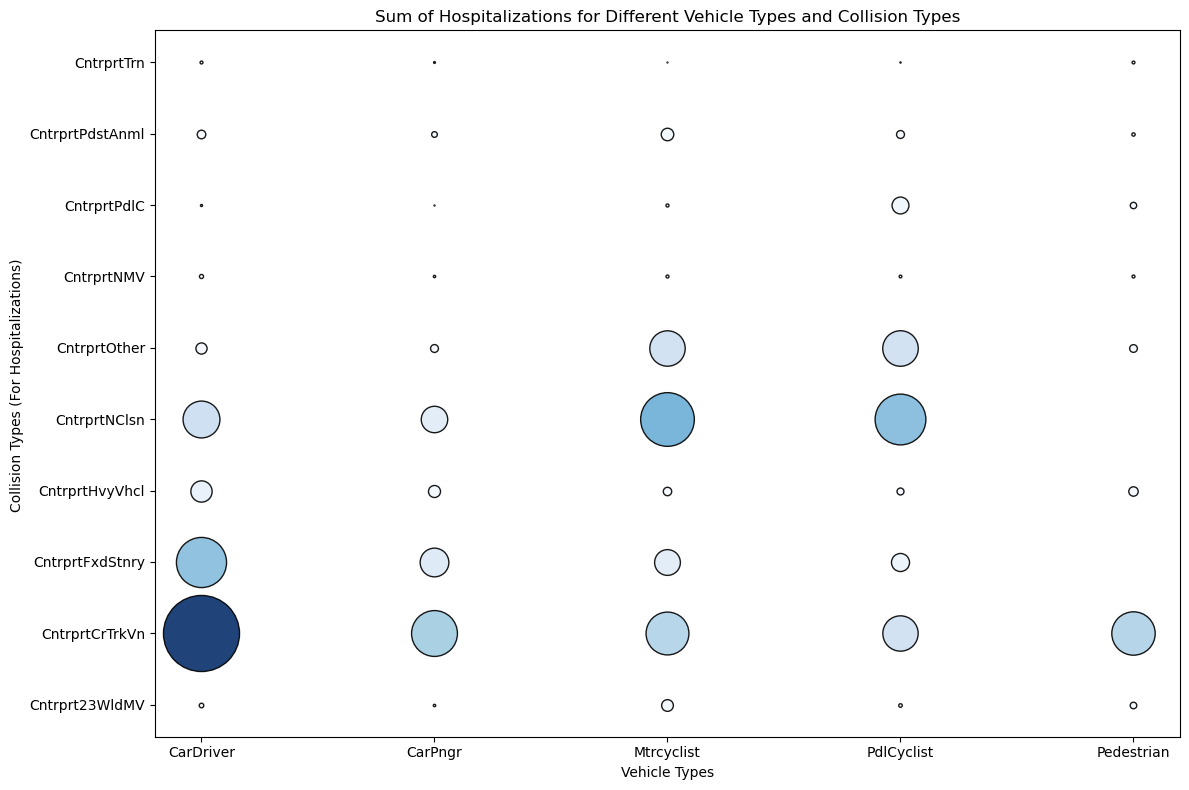

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = {
    "CarDriver": [255, 72188, 31362, 5651, 16964, 1560, 209, 54, 923, 104],
    "CarPngr": [71, 26243, 10284, 1808, 8729,  773, 69, 11, 402, 42],
    "Mtrcyclist": [1716, 22914, 8284, 883, 35987,  15648, 109, 115, 1959, 9],
    "PdlCyclist": [155, 15579, 4071, 602, 32166,  15755, 94, 3555, 780, 16],
    "Pedestrian": [534, 23500, 0, 1108, 0,  744, 108, 509, 137, 101]
}
index = ["Cntrprt23WldMV", "CntrprtCrTrkVn", "CntrprtFxdStnry", "CntrprtHvyVhcl",
         "CntrprtNClsn", "CntrprtOther", "CntrprtNMV",
         "CntrprtPdlC", "CntrprtPdstAnml", "CntrprtTrn"]

df = pd.DataFrame(data, index=index)

plt.figure(figsize=(12, 8))

max_value = df.values.max()
sizes = (df.values / max_value) * 1000

for i in range(len(index)):
    for j in range(len(data.keys())):
        color = plt.cm.Blues(df.iloc[i][j] / max_value) 
        plt.scatter(j, i, s=sizes[i][j]*3, alpha=0.9, c=color, edgecolor='black')

plt.title("Sum of Hospitalizations for Different Vehicle Types and Collision Types")
plt.xlabel("Vehicle Types")
plt.ylabel("Collision Types (For Hospitalizations) ")
plt.xticks(ticks=range(len(data.keys())), labels=data.keys()) 
plt.yticks(ticks=range(len(index)), labels=index)  

plt.tight_layout()  
plt.show()
